In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\91638\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Customer Analysis.csv')
df.head()

,Unnamed: 0,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Cluster
0,0,458989,Female,Yes,36,Yes,0.0,Low,1.0,0
1,1,458994,Male,Yes,37,Yes,8.0,Average,4.0,2
2,2,458996,Female,Yes,69,No,0.0,Low,1.0,0
3,3,459000,Male,Yes,59,No,11.0,High,2.0,2
4,4,459001,Female,No,19,No,NaN,Low,4.0,1


## 1st method

(array([257., 204., 275., 271., 280., 286., 235., 279., 260., 280.]),
 array([18., 25., 28., 32., 37., 41., 46., 50., 58., 69., 89.]),
 <BarContainer object of 10 artists>)

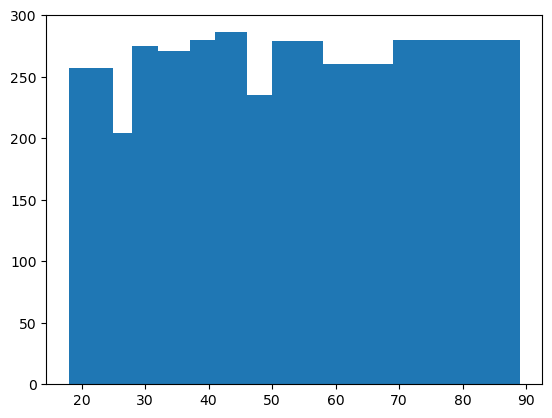

In [3]:
def equal_obs(x,nbin):
    nlen = len(x)
    return np.interp(np.linspace(0,nlen,nbin+1),
                     np.arange(nlen),
                     np.sort(x)
                     )
    
plt.hist(df['Age'],equal_obs(df['Age'],10))

In [4]:
help(np.interp)

Help on _ArrayFunctionDispatcher in module numpy:

interp(x, xp, fp, left=None, right=None, period=None)
    One-dimensional linear interpolation for monotonically increasing sample points.
    
    Returns the one-dimensional piecewise linear interpolant to a function
    with given discrete data points (`xp`, `fp`), evaluated at `x`.
    
    Parameters
    ----------
    x : array_like
        The x-coordinates at which to evaluate the interpolated values.
    
    xp : 1-D sequence of floats
        The x-coordinates of the data points, must be increasing if argument
        `period` is not specified. Otherwise, `xp` is internally sorted after
        normalizing the periodic boundaries with ``xp = xp % period``.
    
    fp : 1-D sequence of float or complex
        The y-coordinates of the data points, same length as `xp`.
    
    left : optional float or complex corresponding to fp
        Value to return for `x < xp[0]`, default is `fp[0]`.
    
    right : optional float or c

<AxesSubplot:xlabel='Age', ylabel='Count'>

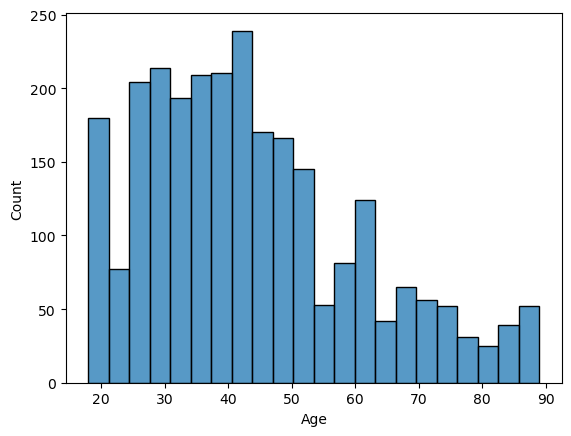

In [5]:
sns.histplot(data = df, x = 'Age')

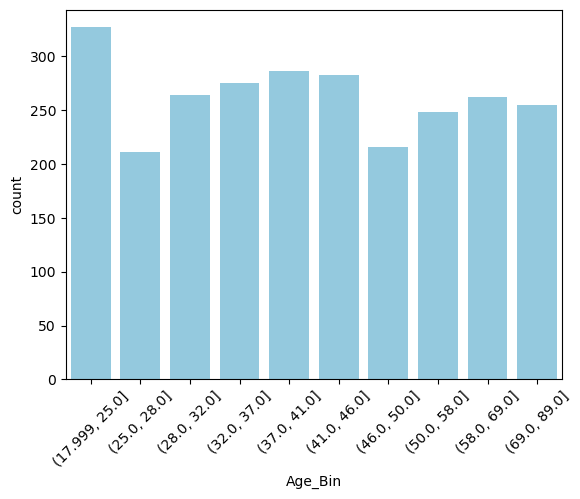

In [6]:
df['Age_Bin'] = pd.qcut(df['Age'], q=10)


sns.countplot(data=df, x='Age_Bin', color='skyblue')
plt.xticks(rotation=45)

plt.show()

## VIF

In [7]:
data_cleaned = df.dropna()

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder



for column in ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])



features = data_cleaned[['Gender', 'Ever_Married', 'Age', 'Graduated', 'Work_Experience', 'Spending_Score', 'Family_Size']]

vif_data = pd.DataFrame()
vif_data["Variable"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]

vif_data


C:\Users\91638\AppData\Local\Temp\ipykernel_12652\2426836795.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[column] = le.fit_transform(data_cleaned[column])


,Variable,VIF
0,Gender,2.219114
1,Ever_Married,5.319008
2,Age,9.719938
3,Graduated,2.814455
4,Work_Experience,1.557010
5,Spending_Score,3.913148
6,Family_Size,3.078592


In [9]:
2627/37

71.0